# Explorative Data Analysis of Telecom Data
 

#### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Load telecom dataset


In [3]:
file_path = 'Dataset\\telecom_customer_churn.csv'
churn_data = pd.read_csv(file_path)

### Dataset Structure and Basic Info

Here, we explore the structure of the dataset by checking the number of columns, their data types, and missing values.


In [4]:
churn_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [5]:
churn_data.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


#### Observations:
-**Zip Code, Latitude, and Longitude**: these are locations of customers and vary over a large range
-Avg age of customers is 46.5
-The average customer tenure is about **32 months**, with a minimum of **1 month** and a maximum of **72 months**.
- There is quite a variantion in tenure with the twenty fifth percentile at **nine months** and the seventy fifth percentile at **fifty five months**. This suggests a few clients are noticeably new, at the same time as others have been with the company for a long time.

**Monthly and Total Charges**:
   - The **mean monthly charge** is approximately **£63.60**, but there are customers with negative charges (minimum: -10). Will need to look into this more
   - The **total charges** vary widely, ranging from **£18.80 to £8684.80**. 
   - Similarly, there’s a notable spread in total charges, evident from the large standard deviation.

**Total Refunds**:
   - Most customers do not receive refunds, as indicated by the mean value of **£1.96** and a 50th percentile of **£0.00**.
   - However a few customer get some significant refund.


### Check for missing values in the dataset

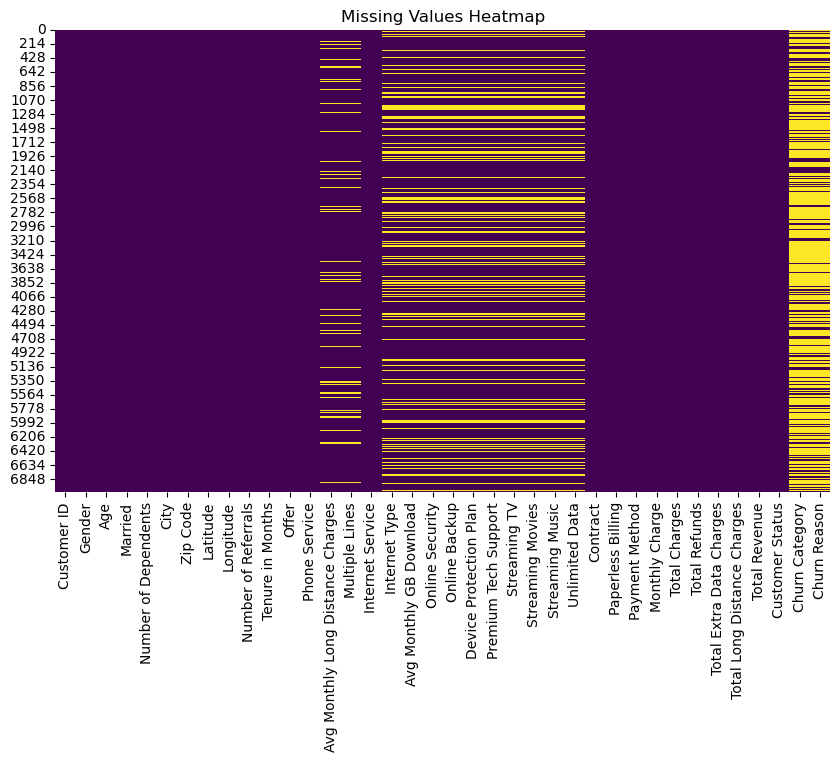

In [6]:
# heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(churn_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


##### Heatmap observations
- The Heatmap shows several missing values:
    - **Churn_reason**: Many missing values, may require nullifying this as its use would be very limited.
    - **Avg Monthly Long Distance Charges**, **Avg Monthly GB Download**, and **Total Refunds** also have some missing values.
    -`Customer ID`, `Gender`, `Marital Status`, and `Tenure in Months` have no missing values, which is very good.
    